In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join 

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
DataPath = r'D:\GitWork\titanic\data'
OutPath  = r'D:\GitWork\titanic\output'

TrainFile  = 'train.csv'
TestFile   = 'test.csv'
SubmitFile = 'Submission01.csv'

In [3]:
# Importing the data and displaying some rows
f_abspath = join(DataPath, TrainFile)
df_train = pd.read_csv(f_abspath)

display(df_train.info())
display(df_train.head(10))
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
features = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Fare']
df_data = df_train[features].copy()
display(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Fare         891 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


None

In [5]:
# Process Sex
uni_set = sorted(df_train.Sex.unique())
codes = [i for i in range(len(uni_set))]

dict_sex = dict(zip(uni_set, codes))
print('Sex dict:', dict_sex)

df_data['Sex_code'] = df_data['Sex'].map(dict_sex)
print(); display(df_data.info())

Sex dict: {'female': 0, 'male': 1}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Fare         891 non-null    float64
 5   Sex_code     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


None

In [6]:
def plotBarStacked(df_plt, ax, title=None):
    ax.set_title('{} stacked'.format(title))
    ax.set_xlabel('')
    df_plt.plot(kind='bar', stacked=True, rot=0, ax=ax)

    offset = 30
    dic_top = {}
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        left, bottom = p.get_xy()
        val = bottom + height
        
        if left not in dic_top: 
            dic_top[left] = 5 if height<5 else height
        else:
            dic_top[left] += height if height > offset else offset
        top = dic_top[left]

        ax.annotate(
            '{}'.format(val),
            xy = (left+width/2, top),
            xytext = (0, 1),
            textcoords = "offset points",
            ha = 'center', 
            va = 'bottom'
        )
    return

def plotBarUnstack(df_plt, ax, title):
    ax.set_title('{} unstack'.format(title))
    ax.set_xlabel('')
    df_plt.plot(kind='bar', stacked=False, rot=0, ax=ax)

    for p in ax.patches:
        width  = p.get_width()
        height = p.get_height()
        left, bottom = p.get_xy()
        val = p.get_height()
        ax.annotate(
            '{}'.format(val),
            xy = (left+width/2, height),
            xytext = (0, 1),
            textcoords = "offset points",
            ha = 'center', 
            va = 'bottom'
        )
    return

In [7]:
features = ['Survived', 'Pclass', 'Fare']
df_data = df_train[features].copy()
# display(df_data)

fare_min = df_data.Fare.min().astype(int)
print('Fare min: {}'.format(fare_min))

fare_max = df_data.Fare.max().astype(int)
print('Fare max: {}'.format(fare_max))

bins = np.linspace(fare_min, fare_max+1, 10, dtype=int)
print('bins:', bins)

df_data['Bin'] = pd.cut(df_data['Fare'], bins, right=False)
# display(df_data)

df_fare = pd.DataFrame({
    '1': df_data.Bin[df_data.Pclass==1].value_counts(),
    '2': df_data.Bin[df_data.Pclass==2].value_counts(),
    '3': df_data.Bin[df_data.Pclass==3].value_counts()
})
col_pcls = df_fare.columns

intervals = df_fare.index
df_fare.insert(0, 'Interval', intervals)

df_fare.reset_index(drop=True, inplace=True)

df_fare['Count'] = df_fare[col_pcls].sum(axis=1)
display(df_fare)

num_rows = df_fare.Count.sum(axis=0)
print('Total rows:', num_rows)

# pivot = pd.pivot_table(
#     df_data, 
#     values=['Fare'], 
#     index=['Bin', 'Survived'], 
#     columns=['Pclass'], 
#     aggfunc='count'
# ).replace(np.nan, 0).astype(int)

# print(pivot.columns)
# pivot['Count'] = pivot[pivot.columns].sum(axis=1)
# display(pivot)

Fare min: 0
Fare max: 512
bins: [  0  57 114 171 228 285 342 399 456 513]


,Interval,1,2,3,Count
0,"[0, 57)",103,177,484,764
1,"[57, 114)",71,7,7,85
2,"[114, 171)",22,0,0,22
3,"[171, 228)",9,0,0,9
4,"[228, 285)",8,0,0,8
5,"[285, 342)",0,0,0,0
6,"[342, 399)",0,0,0,0
7,"[399, 456)",0,0,0,0
8,"[456, 513)",3,0,0,3


Total rows: 891


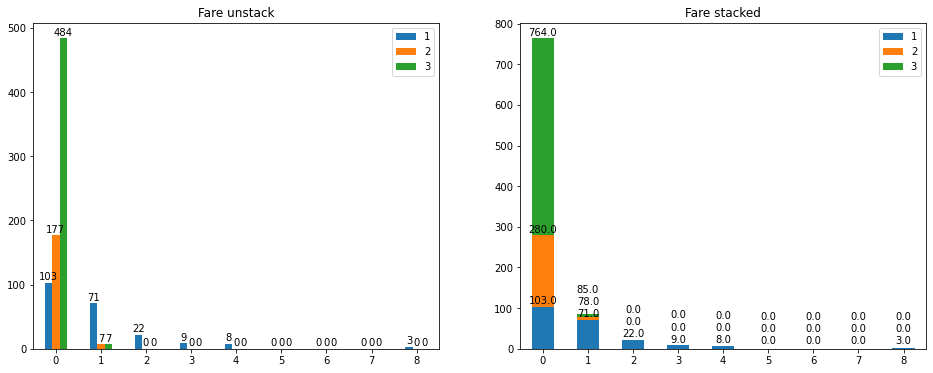

In [8]:
cols_plt = ['1', '2', '3']
df_plot = df_fare[cols_plt]
fig, axes = plt.subplots(1,2,figsize=(16,6))
plotBarUnstack(df_plot, axes[0], 'Fare')
plotBarStacked(df_plot, axes[1], 'Fare')
plt.show()

In [9]:
features = ['Survived', 'Pclass', 'Fare']
df_fare2 = df_data[features].copy()
df_fare2['Log_Fare'] = (df_data.Fare+1).map(lambda x : np.log10(x) if x > 0 else 0)
display(df_fare2.info())

ptable = pd.pivot_table(df_fare2, values=['Fare'], index=['Pclass'], columns=['Survived'], aggfunc='median').round(3)
display(ptable)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Fare      891 non-null    float64
 3   Log_Fare  891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


None

Fare        
Survived      0       1
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

Pclass 
 1 
 2 
 3 
 Total 
 
 
 Bin_Code_4 
 Survived 
 
 
 
 
 
 
 
 
 0 
 0 
 6 
 6 
 167 
 179 
 
 
 1 
 0 
 0 
 44 
 44 
 
 
 1 
 0 
 0 
 53 
 103 
 156 
 
 
 1 
 0 
 33 
 35 
 68 
 
 
 2 
 0 
 24 
 28 
 69 
 121 
 
 
 1 
 27 
 42 
 32 
 101 
 
 
 3 
 0 
 50 
 10 
 33 
 93 
 
 
 1 
 109 
 12 
 8 
 129 
 
 
 Total 
 
 216 
 184 
 491 
 891 
 
 
 
 
 
 Pclass 
 1 
 2 
 3 
 Total 
 
 
 Bin_Code_5 
 
 
 
 
 
 
 
 
 0 
 6 
 6 
 167 
 179 
 
 
 1 
 0 
 24 
 160 
 184 
 
 
 2 
 0 
 80 
 92 
 172 
 
 
 3 
 64 
 64 
 52 
 180 
 
 
 4 
 146 
 10 
 20 
 176 
 
 
 Total 
 216 
 184 
 491 
 891 
 
 
 
 
 
 Pclass 
 1 
 2 
 3 
 Total 
 
 
 Bin_Code_6 
 
 
 
 
 
 
 
 
 0 
 6 
 6 
 144 
 156 
 
 
 1 
 0 
 0 
 152 
 152 
 
 
 2 
 0 
 86 
 53 
 139 
 
 
 3 
 6 
 53 
 90 
 149 
 
 
 4 
 76 
 32 
 38 
 146 
 
 
 5 
 128 
 7 
 14 
 149 
 
 
 Total 
 216 
 184 
 491 
 891

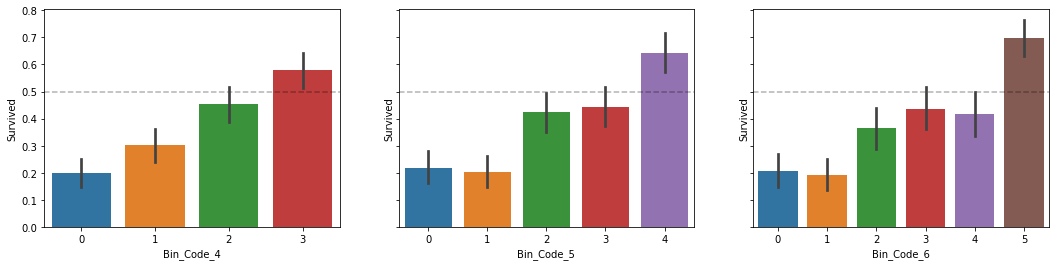

In [14]:
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)    
    
df_fare2['Bin4'] = pd.qcut(df_fare2['Fare'], 4)
df_fare2['Bin5'] = pd.qcut(df_fare2['Fare'], 5)
df_fare2['Bin6'] = pd.qcut(df_fare2['Fare'], 6)
# display(df_fare2.head())

label = LabelEncoder()
df_fare2['Bin_Code_4'] = label.fit_transform(df_fare2['Bin4'])
df_fare2['Bin_Code_5'] = label.fit_transform(df_fare2['Bin5'])
df_fare2['Bin_Code_6'] = label.fit_transform(df_fare2['Bin6'])
# display(df_fare2.head())

# df_4 = pd.crosstab(df_fare2['Bin_Code_4'], df_fare2['Pclass'], margins=True)
df_4 = pd.crosstab([df_fare2.Bin_Code_4, df_fare2.Survived], df_fare2['Pclass'], margins=True, margins_name='Total')
df_5 = pd.crosstab(df_fare2['Bin_Code_5'], df_fare2['Pclass'], margins=True, margins_name='Total')
df_6 = pd.crosstab(df_fare2['Bin_Code_6'], df_fare2['Pclass'], margins=True, margins_name='Total')

display_side_by_side(df_4, df_5, df_6)

fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)

for ax in axes:
    ax.axhline(0.5, linestyle='dashed', c='black', alpha=0.3)
g0 = sns.barplot(x='Bin_Code_4', y='Survived', data=df_fare2, ax=axes[0])
g1 = sns.barplot(x='Bin_Code_5', y='Survived', data=df_fare2, ax=axes[1])
g2 = sns.barplot(x='Bin_Code_6', y='Survived', data=df_fare2, ax=axes[2])

plt.show()

In [11]:
# Training 1
features = ['Survived', 'Sex','Pclass', 'Fare']
df_data = df_train[features].copy()

# For Sex
df_data['Sex_code'] = df_data['Sex'].map(dict_sex)

# For Fare
bins_fare = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 513] 
df_data['Bin'] = pd.cut(df_data['Fare'], bins_fare, right=False)
df_data['Fare_code'] = df_data.Bin.map(dict_fare)
display(df_data)

# inps = df_data.filter(features, axis=1)
# lbls = df_data['Survived']

# rf_model = RandomForestClassifier(
#     random_state=2, n_estimators=250, min_samples_split=20, oob_score=True
# )

# rf_model.fit(inps, lbls)
# print('oob score :%.5f' %(rf_model.oob_score_))

NameError: name 'dict_fare' is not defined

In [ ]:
# Prediction

# Convert Sex to Sex_code
f_abspath = join(DataPath, TestFile)
df_test = pd.read_csv(f_abspath)
display(df_test.info())
display(df_test.head())

In [ ]:
# Process Fare column

# Fill null Fare 
df_test.Fare.fillna(df_test.Fare.mean())

In [ ]:
# Extract features
df_data = pd.DataFrame({
    'PassengerId': df_test.PassengerId,
    'Pclass': df_test.Pclass,
    'Sex_code': df_test['Sex'].map(dict_sex),
    'Fare'_code: 
})
display(df_data.info())


# Extract test columns
features = ['PassengerId', 'Sex_code','Pclass']
inps = df_data.filter(features, axis=1)

df_data['Survived'] = rf_model.predict(inps)
display(df_data.info())

f_abspath = join(OutPath, 'Submission01.csv')
out_features = ['PassengerId', 'Survived']
df_res = df_data[out_features]
df_res.to_csv(f_abspath, index=False)
